In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise import Reader
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from sklearn.utils import shuffle

from surprise import SVD
import nltk
import os

import matplotlib.animation as animation


#nltk.download() ##I didnt want to download at every run of the notebook, but if you get problems try to uncomment this

In [42]:
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



## WE ARE READING A great classic book today, called "Oliver Twist", how great is that?!!!
#### author: Charles Dickens, type: novel

#### I remember when I was a young laddie in the 1990s we used to go to the library and borrow paperbooks back in the day...
#### but nowadays we can download project gutenberg books for free from online, if that copyright had expired!

* it is a great novel about childhood poverty and it has quite funny parts also even though in modern perspective it is a little bit sad book, well, enough about spoilers, but it was available in project gutenberg








## main ideas how to begin



1. I had this genious idea even though I'm a dummy... we could load the entire book (.txt) into pandas csv file, which is delinieated by '\n' newline- characters instead of regular csv separators such as ';' or ','
2. this seems to work especially in project gutenberg files and I of course looked at the oliver_twist.txt file before deciding this
3. then we can get fast performance hopefully for column operations
4. we can add a rowCount column so that we get 1-based indexing helper column
5. we should be able to apply functions into the strings, which are in the rowString column (I will make it when load csv)
6. we should be able to get quick counts into a helper column for the sum(poswords-negwords) quite easily
7. we should make positibe words and negative words into python dictionaries, such that we get good performance boost when we search into them (we will have to make lookups into the dicts, to find if the word is positive or negative or neither of them => implies neutral)
8. search each row for each word check if you find it in either of the two dictionaries, if not found it was neutral

9. how to do the rolling average,,, i dont know off the top of my head, I hope there is a pandas function for that

I will give credits here to the negative-words and positive-words text file authors who I believe were the following persons and authorities:

### NOTE::!! 


* the original negative-words file was little bit corruped from the OMA workspace, it didn't contain any newlines so that all those negative words were appended together. So, the best way was to manually copy-paste those negative words straight from the github txt file online and copy into a new textfile


* I believe that the required files were 3 of them



1. pos-words file
2. neg-words file
3. oliver_twist file


>   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 

> Proceedings of the ACM SIGKDD International Conference on Knowledge 

> Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
 
>  Washington, USA, 
 
>  Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
 
 > and Comparing Opinions on the Web." Proceedings of the 14th 
 
>  International World Wide Web conference (WWW-2005), May 10-14, 
 
>  2005, Chiba, Japan.

In [43]:
path0 = r'C:\Users\Lauri\Documents\HealthTechnology Mathematics&Methods\returnable lab 7 sentiment analysis\oliver_twist.txt'

## WE are reading great classic book today, called "Oliver Twist"
oliverTwistDF = pd.read_csv(path0, sep='\n', header=None, names=['rowString'], skiprows = 16, skip_blank_lines=True )
oliverTwistDF.head(20)


,rowString
0,*** START OF THIS PROJECT GUTENBERG EBOOK OLIV...
1,Produced by Peggy Gaugy and Leigh Little. HTM...
2,OLIVER TWIST
3,OR
4,THE PARISH BOY'S PROGRESS
5,BY
6,CHARLES DICKENS
7,CONTENTS
8,I TREATS OF THE PLACE WHERE OLIVER TWI...
9,CIRCUMSTANCES ATTENDING HIS BIRTH


In [44]:
oliverTwistDF['rowString'][150]
##it seems to have worked

'from the pillow; and a faint voice imperfectly articulated the words,'

In [45]:
quickCheck = oliverTwistDF.iloc[150:200, 0:1]
quickCheck

,rowString
150,from the pillow; and a faint voice imperfectly...
151,"'Let me see the child, and die.'"
152,The surgeon had been sitting with his face tur...
153,giving the palms of his hands a warm and a rub...
154,"young woman spoke, he rose, and advancing to t..."
155,more kindness than might have been expected of...
156,"'Oh, you must not talk about dying yet.'"
157,"'Lor bless her dear heart, no!' interposed the..."
158,"depositing in her pocket a green glass bottle,..."
159,she had been tasting in a corner with evident ...


In [46]:
##NOTE::!! this part was just a precaution it might be unnecessary in reality

oliverTwistDF['rowString']=oliverTwistDF['rowString'].astype(str)
oliverTwistDF.dtypes


rowString    object
dtype: object

## we could probably remove some special characters, but I'm not really sure if its that necessary, it would allow to find more positive and negative words, though...



In [47]:
"""
>>> line = "H E?.LL!/;O:: "  
>>> for char in ' ?.!/;:':  
...  line = line.replace(char,'')  
...
>>> print line
HELLO
"""


def removeForbidden(string):
    wordList = string.split()
    forbiddenChars = ",.!:;'_?"
    for i in range(len(wordList)):
        for char in forbiddenChars:
            wordList[i] = (wordList[i].replace(char,''))
    return ' '.join(wordList)

In [49]:
cleanedString = oliverTwistDF['rowString'].apply(removeForbidden)
print(cleanedString) #seems to work?! its inefficient computationally and some kind of regex might be better

#the problem is that python string are immmutable
oliverTwistDF['rowString']= cleanedString

0        *** START OF THIS PROJECT GUTENBERG EBOOK OLIV...
1        Produced by Peggy Gaugy and Leigh Little HTML ...
2                                             OLIVER TWIST
3                                                       OR
4                                 THE PARISH BOYS PROGRESS
5                                                       BY
6                                          CHARLES DICKENS
7                                                 CONTENTS
8        I TREATS OF THE PLACE WHERE OLIVER TWIST WAS B...
9                        CIRCUMSTANCES ATTENDING HIS BIRTH
10       II TREATS OF OLIVER TWISTS GROWTH EDUCATION AN...
11       III RELATES HOW OLIVER TWIST WAS VERY NEAR GET...
12                          WOULD NOT HAVE BEEN A SINECURE
13       IV OLIVER BEING OFFERED ANOTHER PLACE MAKES HI...
14                                             PUBLIC LIFE
15       V OLIVER MINGLES WITH NEW ASSOCIATES GOING TO ...
16       FIRST TIME HE FORMS AN UNFAVOURABLE NOTION OF .

## load the pos and neg wordfiles into python and make dicts from each file


In [50]:
def toLowerAndLemmatize(string):
    words = string.split()
    words = [token.lower() for token in words if token.isalpha()]
    ctokens = words
    lemmatizer = WordNetLemmatizer()
    for i in range(len(ctokens)):
        temp = lemmatizer.lemmatize(ctokens[i])
        ctokens[i] = temp
        
    return ' '.join(ctokens)

In [51]:


posPath = r'C:\Users\Lauri\Documents\HealthTechnology Mathematics&Methods\returnable lab 7 sentiment analysis\positive-words.txt'
negPath = r'C:\Users\Lauri\Documents\HealthTechnology Mathematics&Methods\returnable lab 7 sentiment analysis\negative-words.txt'

posDict = {}
negDict = {}

def makeDictPos(path):
    posfile = open(path)
    str0 = posfile.readlines()
    keyList = str0
    for key in keyList:
        key = key[:-1] ## remove the trailing newline
        posDict[key] = 1
    posfile.close()
        
def makeDictNeg(path):
    negfile = open(path)
    str0 = negfile.readlines()
    keyList = str0
    for key in keyList:
        key = key[:-1] ## remove the trailing newline
        negDict[key] = -1
    negfile.close()
        
        
def sentimentScore(string, pos=posDict, neg=negDict):
    sscore = 0
    wordList = string.split()
    for word in wordList:
        if (word in pos):
            sscore += 1
        else:
            if (word in neg):
                sscore -=1
            else:
                continue
                
    return sscore
        
    
    

In [52]:
## checked that our dicts existed

makeDictPos(posPath)
makeDictNeg(negPath)
print( ('a+' in posDict))
print(('abnormal' in negDict))

True
True


In [53]:
lowerAndLemma = oliverTwistDF['rowString'].apply(toLowerAndLemmatize)
#lowerAndLemma ##seems to work
oliverTwistDF['rowString'] = lowerAndLemma

In [54]:
sentiments =  oliverTwistDF['rowString'].apply(sentimentScore)  

In [55]:
print(np.unique(sentiments)) ## seems to work but its difficult to verify


[-5 -4 -3 -2 -1  0  1  2  3  4]


## verify that sentimentscore func works by running it against positive words file

In [56]:
posfile = open(posPath)
str1 = posfile.readlines()
str1 = [word[:-1] for word in str1]
test0 = pd.Series(str1)
test0 = test0.apply(sentimentScore)
#print(test0)
posfile.close()


## functions seem to work nicely!

In [57]:
oliverTwistDF['sentiments'] = sentiments
oliverTwistDF.iloc[150:170, 0:2]

## seems to work!

,rowString,sentiments
150,from the pillow and a faint voice imperfectly ...,-2
151,let me see the child and die,-1
152,the surgeon had been sitting with his face tur...,0
153,giving the palm of his hand a warm and a rub a...,1
154,young woman spoke he rose and advancing to the...,0
155,more kindness than might have been expected of...,1
156,oh you must not talk about dying yet,-1
157,lor bless her dear heart no interposed the nur...,0
158,depositing in her pocket a green glass bottle ...,0
159,she had been tasting in a corner with evident ...,0


## apparently pandas does have a rolling average func


In [58]:
"""
>>> s = pd.Series([1, 2, 3, 4])
>>> s.rolling(2).mean()
0    NaN
1    1.5
2    2.5
3    3.5
dtype: float64
"""



rollingavg =  oliverTwistDF['sentiments'].rolling(7).mean()
rollingavg = rollingavg.fillna(0)
oliverTwistDF['rollingAvg'] = rollingavg
##seems to work

## must fill the beginings NANs with zeroes because thats just the way the window works at the start
## thats just the way the cookie crumbles...
## it reminds me of the way that causal sequences worked in our digital signals processing course
## where we had discrete math portions also in that course
## so there is no way to calculate the window for the first positions (?)
## I reckon you could apply the window manually from the 3nd ind on both sides of the indeces manually
## then start looping forwards from that 3rd index and hope that the last indeces are calculated correctly

## Plot our results from the oliverTwistDF columns.
* indeces is the x-axis, and rollingAvg is y-axis
* REMEMBER plot has to be advancing dynamically, with the window sliding to new values ???
* the computed values all exist in storage already

In [59]:
oliverTwistDF.shape

(15026, 3)

In [60]:
from matplotlib.animation import FuncAnimation



In [61]:
xAxis = np.arange(0, oliverTwistDF.shape[0], 1 )
yAxis = np.array(oliverTwistDF['rollingAvg'])
print(yAxis[6])   ##seems to work

print(yAxis.shape)
print(xAxis.shape)

-0.14285714285714285
(15026,)
(15026,)


## I looked for help on stackoverflow about dynamic plots because it was not clear how to approach the issue

* originally I thought that static plot had been enough, but I re-read the assignment and it said dynamic plot
* rolling average plot with a windowSize = 7
* furthermore it was a bit tricky to work with the pre-computed data values, and how to plot them one by one
* I think it might work, but it probably plots in a foreverloop and rolls over into  the 0eth row once the book is finished at the last row

* I didn't verify that the plot worked all the way until the last index and that the program works after that ?!
* but the initial indeces and values seem to be ok from the start

link

https://stackoverflow.com/questions/49364765/plot-a-rolling-window-with-matplotlib

https://matplotlib.org/examples/animation/index.html

https://matplotlib.org/api/animation_api.html#matplotlib.animation.FuncAnimation

https://github.com/jupyter/notebook/issues/4467

<IPython.core.display.Javascript object>


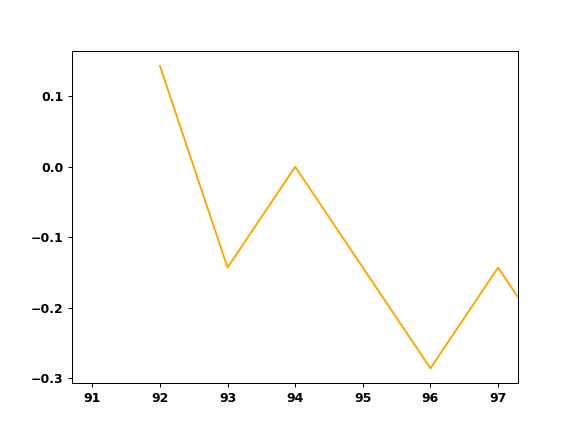

In [63]:
%matplotlib notebook 
##needed magic for plotting the animations, I think, it forces animatinos to use matplotlib
from collections import deque


def animate(i):
    global x
    x += 1
    if x>=oliverTwistDF.shape[0]:
        x=0 #reset the animation???
        
    y = yAxis[x]
    data.append((x, y))
    ax.relim()
    ax.autoscale_view()
    line.set_data(*zip(*data))


fig, ax = plt.subplots()
initInd = 0
x = initInd
y = yAxis[initInd]
data = deque([(x, y)], maxlen=7)
line, = plt.plot(*zip(*data), c='orange')

ani = animation.FuncAnimation(fig, animate, interval=250)
plt.show()

## Overall results

* I used hardcoded values for the windowSize for the rolling average, for computation and for plotting
* I used the precomputation strategy, because I thought that  it would be the best way to proceed, but I didn't read originally that the plot had to be dynamic plot in animation style

* I think overall, using the pandas style for pre-computation was a good tactic, because it allows powerful single line code to be implemented quickly.

* the downside overall was that a lot of string operations had to be done, so that the efficiency does suffer from that


### for cleaning up the code
1. for efficiency it would be best to refactor those string operations functions such that you dont always have to create temporary lists of strings from the string (string that was in particular rowString column cell)
2. the dynamic plotting was quite difficult to do actually!, I had to spend some time on stackoverflow and looking at matplotlib animation documentation
3. I had a bit of an Anaconda/jupyter notebook disaster on Monday when doing trying to finish úp this notebook. All my notebooks stopped opening in the jupyter notebook. It may have occcured when doing an anaconda update while having the notebook open. Then, I reinstalled entire anaconda, and the problem was still there, no notebooks were able to be opened.
4. final fix was to search on github and do some registry-edits on windows, that fixed it


> registry HKCR/.js/Content-Type as the content-type for js files. It's text/plain on my computer.
> Changing it to text/javascript fixed it.